# 라이브러리 임포트

In [1]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 903.9 kB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd

import category_encoders as ce

# 변수 유형

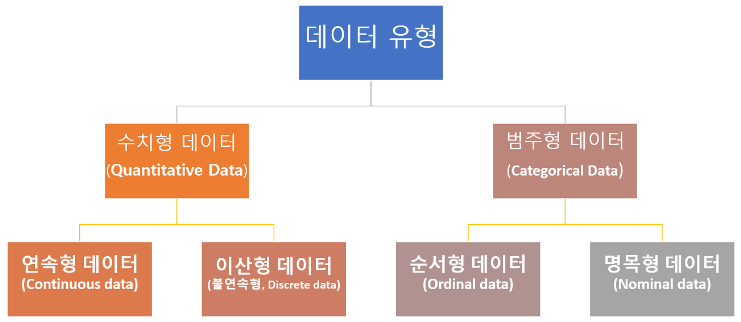

# [데이터 인코딩](https://contrib.scikit-learn.org/category_encoders/index.html)

> 데이터 인코딩은 크게 Norminal Encoding과 Ordinal Encoding으로 나눌 수 있다.  
> 구분하는 방법은 순서정보가 있으면, Ordinal 없으면 Norminal이다.  

예)
- 순서정보가 있는 데이터: 과목 성적, 영화 평점...
- 순서정보가 없는 데이터: 성별, 혈액형....

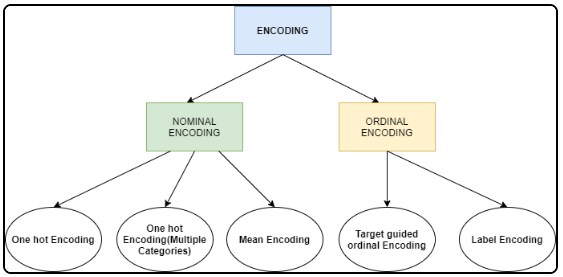

## Norminal Encoding

### One hot Encoding
> 피처의 항목이 많은 경우 차원의 저주에 빠질 수 있다.

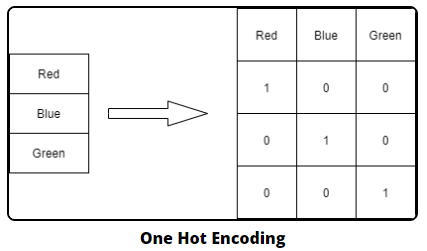

In [3]:
data = {'color': ['Red', 'Blue', 'Green']}
df = pd.DataFrame(data)
df.head()

,color
0,Red
1,Blue
2,Green


category_encoders을 이용한 인코딩

In [4]:
encoder = ce.OneHotEncoder(use_cat_names=True) # 인코딩 객체 만들어짐.

df_encoded = encoder.fit_transform(df) # 인코딩 객체가 fit, transform....

df_encoded.head() # transform 결과 보기

,color_Red,color_Blue,color_Green
0,1,0,0
1,0,1,0
2,0,0,1


### Mean Encoding

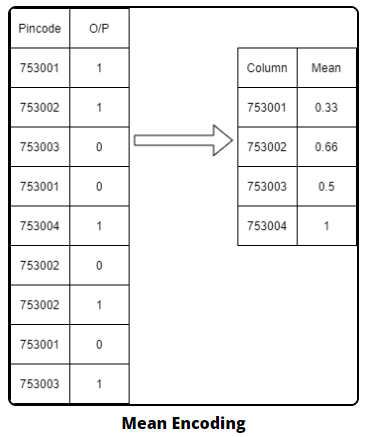

In [5]:
data = {'Pincode': ['753001', '753002', '753003', '753001', '753004', '753002', '753002', '753001', '753003']
        , 'O/P': [1, 1, 0, 0, 1, 0, 1, 0, 1]}
df = pd.DataFrame(data)
df

,Pincode,O/P
0,753001,1
1,753002,1
2,753003,0
3,753001,0
4,753004,1
5,753002,0
6,753002,1
7,753001,0
8,753003,1


In [6]:
group_mean = df.groupby('Pincode')['O/P'].mean()
group_mean

,O/P
Pincode,
753001,0.333333
753002,0.666667
753003,0.500000
753004,1.000000


In [7]:
df['Mean'] = df['Pincode'].map(group_mean)
df.head()

,Pincode,O/P,Mean
0,753001,1,0.333333
1,753002,1,0.666667
2,753003,0,0.500000
3,753001,0,0.333333
4,753004,1,1.000000


## Ordinal Encoding

### Label Encoding

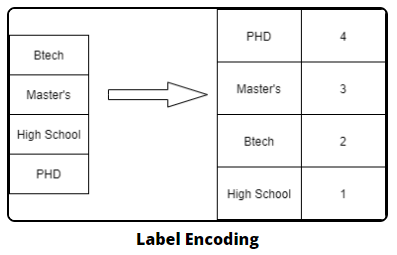

In [8]:
data = {'column': ['Btech', 'Masters', 'High School', 'PHD']}
df = pd.DataFrame(data)
df.head()

,column
0,Btech
1,Masters
2,High School
3,PHD


sklearn을 이용한 인코딩

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
encoder = LabelEncoder()

df['column_encoded'] = encoder.fit_transform(df['column'])

df.head()

,column,column_encoded
0,Btech,0
1,Masters,2
2,High School,1
3,PHD,3


In [11]:
df['column'].unique()

array(['Btech', 'Masters', 'High School', 'PHD'], dtype=object)

In [12]:
encoder.classes_

array(['Btech', 'High School', 'Masters', 'PHD'], dtype=object)

In [13]:
encoder.inverse_transform([0,1])

array(['Btech', 'High School'], dtype=object)

### Target Encoding

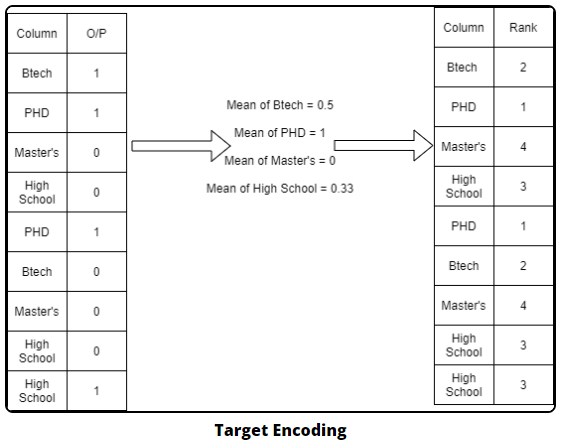

In [14]:
data = {'Column': ['Btech', 'PHD', 'Masters', 'High School', 'PHD', 'Btech', 'Masters', 'High School', 'High School']
        , 'O/P': [1, 1, 0, 0, 1, 0, 0, 0, 1]}
df = pd.DataFrame(data)
df

,Column,O/P
0,Btech,1
1,PHD,1
2,Masters,0
3,High School,0
4,PHD,1
5,Btech,0
6,Masters,0
7,High School,0
8,High School,1


category_encoders을 이용한 인코딩

In [16]:
encoder = ce.TargetEncoder()

df_encoded = encoder.fit_transform(df['Column'], df['O/P'])
df['encoded'] = df_encoded['Column']
df['Rank'] = df['encoded'].rank(method='dense', ascending=False)

df

,Column,O/P,encoded,Rank
0,Btech,1,0.452325,2.0
1,PHD,1,0.523251,1.0
2,Masters,0,0.381400,4.0
3,High School,0,0.427282,3.0
4,PHD,1,0.523251,1.0
5,Btech,0,0.452325,2.0
6,Masters,0,0.381400,4.0
7,High School,0,0.427282,3.0
8,High School,1,0.427282,3.0


### Ordinal Encoding

In [17]:
df = pd.DataFrame(
    {'Fruit': ['시과', '딸기', '바나나', '수박', '포도',
               '메론','자두','체리','화이트베리', '무화과'],
     'color':['red1','red2','yellow','red','purple','green','light red','pink','white','brown'],
     'price': [2000,300,400, 30000, 150, 8000,1000,100,300,800]})

df.head()

,Fruit,color,price
0,시과,red1,2000
1,딸기,red2,300
2,바나나,yellow,400
3,수박,red,30000
4,포도,purple,150


In [18]:
encoder = ce.OrdinalEncoder(cols = 'color')

df_encoded = encoder.fit_transform(df)
df_encoded.head()

,Fruit,color,price
0,시과,1,2000
1,딸기,2,300
2,바나나,3,400
3,수박,4,30000
4,포도,5,150


# 예제

결과 저장

In [19]:
results = []

모델 정의

In [20]:
from sklearn.tree import DecisionTreeClassifier
SEED = 42

데이터 로드

In [21]:
import seaborn as sns

df = sns.load_dataset('titanic')
cols = ["age","sibsp","parch","fare","pclass","sex","embarked", "survived"]

df = df[cols]
df.shape

(891, 8)

데이터 분리

In [22]:
from sklearn.model_selection import train_test_split
SEED=42

train, test = train_test_split(df, random_state=SEED, test_size=0.2)

train.shape, test.shape

((712, 8), (179, 8))

결측치 제거

In [24]:
train.age = train.age.fillna(train.age.mean())
test.age = test.age.fillna(train.age.mean())

train['embarked'] = train.embarked.fillna(train.embarked.mode().values[0])
test.embarked = test.embarked.fillna(train.embarked.mode().values[0])

train.isnull().sum().sum(), test.isnull().sum().sum()

(0, 0)

In [25]:
cols = ["age","fare"]
features_tr = train[cols]
target_tr = train["survived"]
features_te = test[cols]
target_te = test["survived"]

features_tr.shape, target_tr.shape

((712, 2), (712,))

In [26]:
cols_encoding = ["pclass","sex","embarked","sibsp","parch"]
tmp_tr = train[cols_encoding]
tmp_te = test[cols_encoding]

tmp_tr.shape

(712, 5)

In [27]:
tmp_tr.head()

,pclass,sex,embarked,sibsp,parch
331,1,male,S,0,0
733,2,male,S,0,0
382,3,male,S,0,0
704,3,male,S,1,0
813,3,female,S,4,2


In [28]:
tmp_tr['sex'] = tmp_tr['sex'].map({'male':1, 'female':0})
tmp_tr['embarked'] = tmp_tr['embarked'].map({'S':2, 'C':1, 'Q':0})

tmp_te['sex'] = tmp_te['sex'].map({'male':1, 'female':0})
tmp_te['embarked'] = tmp_te['embarked'].map({'S':2, 'C':1, 'Q':0})

<ipython-input-28-333254089c12>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_tr['sex'] = tmp_tr['sex'].map({'male':1, 'female':0})
<ipython-input-28-333254089c12>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_tr['embarked'] = tmp_tr['embarked'].map({'S':2, 'C':1, 'Q':0})
<ipython-input-28-333254089c12>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

In [29]:
tmp_tr.head()

,pclass,sex,embarked,sibsp,parch
331,1,1,2,0,0
733,2,1,2,0,0
382,3,1,2,0,0
704,3,1,2,1,0
813,3,0,2,4,2


In [30]:
tmp_tr.isnull().sum().sum(), tmp_te.isnull().sum().sum()

(0, 0)

## One hot Encoding

In [32]:
encoder = ce.OneHotEncoder(use_cat_names=True)

In [33]:
enco_tr = pd.DataFrame()

In [34]:
tmp_tr.columns

Index(['pclass', 'sex', 'embarked', 'sibsp', 'parch'], dtype='object')

In [35]:
col = 'pclass'
_enco = encoder.fit_transform(tmp_tr[col].astype('category'))
print(_enco.shape)
_enco.head(2)

(712, 3)


,pclass_1.0,pclass_2.0,pclass_3.0
331,1,0,0
733,0,1,0


In [36]:
print(f"before: {enco_tr.shape}")
enco_tr = pd.concat([enco_tr, _enco], axis=1)
print(f"after: {enco_tr.shape}")

before: (0, 0)
after: (712, 3)


In [37]:
# 인코딩 결과를 담을 dataframe 선언/생성
enco_tr = pd.DataFrame()
enco_te = pd.DataFrame()

# 각 인코딩할 컬럼 조회
for col in tmp_tr.columns:
  # train 데이터로 학습 및 변환 작업 진행
  _enco = encoder.fit_transform(tmp_tr[col].astype('category'))
  enco_tr = pd.concat([enco_tr, _enco], axis=1)

  # test 데이터는 변환 작업만 진행
  _enco = encoder.transform(tmp_te[col].astype('category'))
  enco_te = pd.concat([enco_te, _enco], axis=1)

print(f'{enco_tr.shape} / {enco_te.shape}')
enco_tr.head()

(712, 22) / (179, 22)


,pclass_1.0,pclass_2.0,pclass_3.0,sex_1.0,sex_0.0,embarked_2.0,embarked_1.0,embarked_0.0,sibsp_0.0,sibsp_1.0,...,sibsp_2.0,sibsp_8.0,sibsp_5.0,parch_0.0,parch_2.0,parch_1.0,parch_6.0,parch_4.0,parch_3.0,parch_5.0
331,1,0,0,1,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
733,0,1,0,1,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
382,0,0,1,1,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
704,0,0,1,1,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
813,0,0,1,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [38]:
features_tr = features_tr.reset_index(drop=True)
features_te = features_te.reset_index(drop=True)
enco_tr = enco_tr.reset_index(drop=True)
enco_te = enco_te.reset_index(drop=True)

features_tr.shape, enco_tr.shape

((712, 2), (712, 22))

In [39]:
df_tr = pd.concat([features_tr,enco_tr],axis=1).reset_index(drop=True)
df_te = pd.concat([features_te,enco_te],axis=1).reset_index(drop=True)

print(f'{df_tr.shape} / {df_te.shape}')
df_tr.head()

(712, 24) / (179, 24)


,age,fare,pclass_1.0,pclass_2.0,pclass_3.0,sex_1.0,sex_0.0,embarked_2.0,embarked_1.0,embarked_0.0,...,sibsp_2.0,sibsp_8.0,sibsp_5.0,parch_0.0,parch_2.0,parch_1.0,parch_6.0,parch_4.0,parch_3.0,parch_5.0
0,45.5,28.5000,1,0,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1,23.0,13.0000,0,1,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,32.0,7.9250,0,0,1,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
3,26.0,7.8542,0,0,1,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,6.0,31.2750,0,0,1,0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [40]:
# 모델 선언
model = DecisionTreeClassifier(random_state=SEED)

# 모델 학습
model.fit(df_tr,target_tr)

# 모델 평가
tr_score = model.score(df_tr,target_tr)
te_score = model.score(df_te,target_te)

tr_score, te_score

(0.9803370786516854, 0.776536312849162)

In [41]:
results.append(
    {
        'encoding': 'one-hot',
        'tr_score': tr_score,
        'te_score': te_score
    }
)

## Mean Encoding

In [44]:
target_tr.info()

<class 'pandas.core.series.Series'>
Index: 712 entries, 331 to 102
Series name: survived
Non-Null Count  Dtype
--------------  -----
712 non-null    int64
dtypes: int64(1)
memory usage: 11.1 KB


In [42]:
enco_tr = pd.concat([tmp_tr, target_tr], axis=1)
enco_tr.head()

,pclass,sex,embarked,sibsp,parch,survived
331,1,1,2,0,0,0
733,2,1,2,0,0,0
382,3,1,2,0,0,0
704,3,1,2,1,0,0
813,3,0,2,4,2,0


In [43]:
enco_tr = enco_tr.groupby('survived').mean()
enco_tr

,pclass,sex,embarked,sibsp,parch
survived,,,,,
0,2.536036,0.855856,1.70045,0.596847,0.331081
1,1.988806,0.324627,1.58209,0.481343,0.458955


In [45]:
df_tr = features_tr.copy()
df_tr = pd.concat([df_tr.reset_index(drop=True), target_tr.reset_index(drop=True)], axis=1)
df_te = features_te.copy()
df_te = pd.concat([df_te.reset_index(drop=True), target_te.reset_index(drop=True)], axis=1)

df_tr = pd.merge(df_tr, enco_tr, on='survived', how='left')
df_te = pd.merge(df_te, enco_tr, on='survived', how='left')

df_tr.drop(['survived'], axis=1, inplace=True)
df_te.drop(['survived'], axis=1, inplace=True)

print(f'{df_tr.shape} / {df_te.shape}')
df_tr.head()

(712, 7) / (179, 7)


,age,fare,pclass,sex,embarked,sibsp,parch
0,45.5,28.5000,2.536036,0.855856,1.70045,0.596847,0.331081
1,23.0,13.0000,2.536036,0.855856,1.70045,0.596847,0.331081
2,32.0,7.9250,2.536036,0.855856,1.70045,0.596847,0.331081
3,26.0,7.8542,2.536036,0.855856,1.70045,0.596847,0.331081
4,6.0,31.2750,2.536036,0.855856,1.70045,0.596847,0.331081


In [46]:
# 모델 선언
model = DecisionTreeClassifier(random_state=SEED)
# 모델 학습
model.fit(df_tr,target_tr)
# 모델 평가
tr_score = model.score(df_tr,target_tr)
te_score = model.score(df_te,target_te)

tr_score, te_score

(1.0, 1.0)

In [47]:
results.append(
    {
        'encoding': 'mean',
        'tr_score': tr_score,
        'te_score': te_score
    }
)

## Label Encoding

In [48]:
# encoding 선언
encoder = LabelEncoder()

# encoding 결과 저장할 dataframe 선언
enco_tr = pd.DataFrame()
enco_te = pd.DataFrame()

# 컬럼별 encoding.....
for col in tmp_tr.columns:
  # encoding 학습 및 변환
  enco_tr[col] = encoder.fit_transform(tmp_tr[col])
  # encoding 변환
  enco_te[col] = encoder.transform(tmp_te[col])

print(f'{enco_tr.shape} / {enco_te.shape}')
enco_tr.head()

(712, 5) / (179, 5)


,pclass,sex,embarked,sibsp,parch
0,0,1,2,0,0
1,1,1,2,0,0
2,2,1,2,0,0
3,2,1,2,1,0
4,2,0,2,4,2


In [49]:
features_tr = features_tr.reset_index(drop=True)
features_te = features_te.reset_index(drop=True)
enco_tr = enco_tr.reset_index(drop=True)
enco_te = enco_te.reset_index(drop=True)

features_tr.shape, enco_tr.shape

((712, 2), (712, 5))

In [50]:
df_tr = pd.concat([features_tr,enco_tr],axis=1).reset_index(drop=True)
df_te = pd.concat([features_te,enco_te],axis=1).reset_index(drop=True)

print(f'{df_tr.shape} / {df_te.shape}')
df_tr.head()

(712, 7) / (179, 7)


,age,fare,pclass,sex,embarked,sibsp,parch
0,45.5,28.5000,0,1,2,0,0
1,23.0,13.0000,1,1,2,0,0
2,32.0,7.9250,2,1,2,0,0
3,26.0,7.8542,2,1,2,1,0
4,6.0,31.2750,2,0,2,4,2


In [51]:
# 모델 정의
model = DecisionTreeClassifier(random_state=SEED)
# 모델 학습
model.fit(df_tr,target_tr)
# 모델 평가
tr_score = model.score(df_tr,target_tr)
te_score = model.score(df_te,target_te)

tr_score, te_score

(0.9803370786516854, 0.7821229050279329)

In [52]:
results.append(
    {
        'encoding': 'label',
        'tr_score': tr_score,
        'te_score': te_score
    }
)

## Target Encoding

In [53]:
encoder = ce.TargetEncoder()

In [54]:
enco_tr = encoder.fit_transform(tmp_tr.reset_index(drop=True), target_tr.reset_index(drop=True))
enco_te = encoder.transform(tmp_te.reset_index(drop=True))

print(f'{enco_tr.shape} / {enco_te.shape}')
enco_tr.head()

(712, 5) / (179, 5)


,pclass,sex,embarked,sibsp,parch
0,1,1,2,0,0
1,2,1,2,0,0
2,3,1,2,0,0
3,3,1,2,1,0
4,3,0,2,4,2


In [55]:
features_tr = features_tr.reset_index(drop=True)
features_te = features_te.reset_index(drop=True)
enco_tr = enco_tr.reset_index(drop=True)
enco_te = enco_te.reset_index(drop=True)

features_tr.shape, enco_tr.shape

((712, 2), (712, 5))

In [56]:
df_tr = pd.concat([features_tr,enco_tr],axis=1).reset_index(drop=True)
df_te = pd.concat([features_te,enco_te],axis=1).reset_index(drop=True)

print(f'{df_tr.shape} / {df_te.shape}')
df_tr.head()

(712, 7) / (179, 7)


,age,fare,pclass,sex,embarked,sibsp,parch
0,45.5,28.5000,1,1,2,0,0
1,23.0,13.0000,2,1,2,0,0
2,32.0,7.9250,3,1,2,0,0
3,26.0,7.8542,3,1,2,1,0
4,6.0,31.2750,3,0,2,4,2


In [57]:
model = DecisionTreeClassifier(random_state=SEED)
model.fit(df_tr,target_tr)

tr_score = model.score(df_tr,target_tr)
te_score = model.score(df_te,target_te)

tr_score, te_score

(0.9803370786516854, 0.7821229050279329)

In [58]:
results.append(
    {
        'encoding': 'target',
        'tr_score': tr_score,
        'te_score': te_score
    }
)

## Ordinal Encoding

In [59]:
encoder = ce.OrdinalEncoder(cols = tmp_tr.columns)

In [60]:
enco_tr = encoder.fit_transform(tmp_tr)
enco_te = encoder.transform(tmp_te)

print(f'{enco_tr.shape} / {enco_te.shape}')
enco_tr.head()

(712, 5) / (179, 5)


,pclass,sex,embarked,sibsp,parch
331,1,1,1,1,1
733,2,1,1,1,1
382,3,1,1,1,1
704,3,1,1,2,1
813,3,2,1,3,2


In [61]:
features_tr = features_tr.reset_index(drop=True)
features_te = features_te.reset_index(drop=True)
enco_tr = enco_tr.reset_index(drop=True)
enco_te = enco_te.reset_index(drop=True)

features_tr.shape, enco_tr.shape

((712, 2), (712, 5))

In [62]:
df_tr = pd.concat([features_tr,enco_tr],axis=1).reset_index(drop=True)
df_te = pd.concat([features_te,enco_te],axis=1).reset_index(drop=True)

print(f'{df_tr.shape} / {df_te.shape}')
df_tr.head()

(712, 7) / (179, 7)


,age,fare,pclass,sex,embarked,sibsp,parch
0,45.5,28.5000,1,1,1,1,1
1,23.0,13.0000,2,1,1,1,1
2,32.0,7.9250,3,1,1,1,1
3,26.0,7.8542,3,1,1,2,1
4,6.0,31.2750,3,2,1,3,2


In [63]:
model = DecisionTreeClassifier(random_state=SEED)
model.fit(df_tr,target_tr)

tr_score = model.score(df_tr,target_tr)
te_score = model.score(df_te,target_te)

tr_score, te_score

(0.9803370786516854, 0.776536312849162)

In [64]:
results.append(
    {
        'encoding': 'ordinal',
        'tr_score': tr_score,
        'te_score': te_score
    }
)

## 결과 확인

In [65]:
results

[{'encoding': 'one-hot',
  'tr_score': 0.9803370786516854,
  'te_score': 0.776536312849162},
 {'encoding': 'mean', 'tr_score': 1.0, 'te_score': 1.0},
 {'encoding': 'label',
  'tr_score': 0.9803370786516854,
  'te_score': 0.7821229050279329},
 {'encoding': 'target',
  'tr_score': 0.9803370786516854,
  'te_score': 0.7821229050279329},
 {'encoding': 'ordinal',
  'tr_score': 0.9803370786516854,
  'te_score': 0.776536312849162}]

In [66]:
pd.DataFrame(results).sort_values(by=['te_score', 'tr_score'], ascending=[False, False])

,encoding,tr_score,te_score
1,mean,1.000000,1.000000
2,label,0.980337,0.782123
3,target,0.980337,0.782123
0,one-hot,0.980337,0.776536
4,ordinal,0.980337,0.776536
